In [1]:
import typing
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def read_data(f) -> typing.Tuple[np.array, str, str]:
    method = f.readline()  # method
    head = f.readline()  # head
    # line: size, exec time mean, exec time std
    data = np.vstack([list(map(float, line.split())) for line in f.readlines()])
    return data, method, head

with open("bench_res\\fast_precision.txt") as fast_precision:
    fast_precision_data = read_data(fast_precision)[0]
with open("bench_res\\kde_precision.txt") as kde_precision:
    kde_precision_data = read_data(kde_precision)[0]
with open("bench_res\\naive_precision.txt") as naive_precision:
    naive_precision_data = read_data(naive_precision)[0]

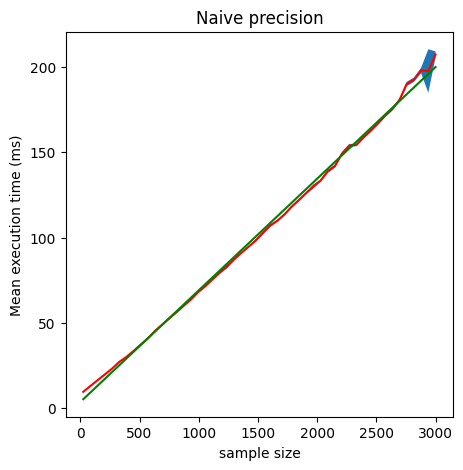

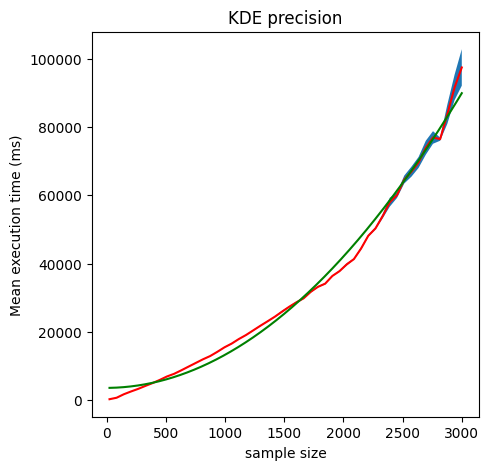

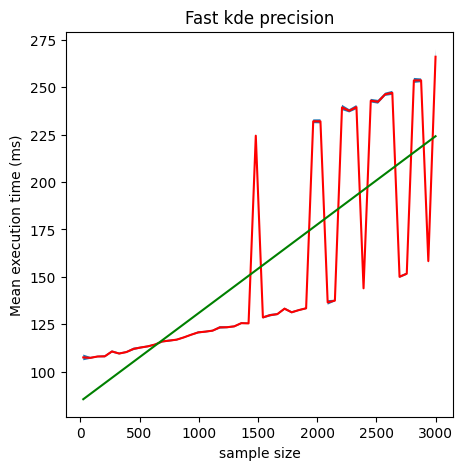

In [13]:
figures = [plt.figure() for _ in range(3)]
for figure in figures:
    figure.subplots(1, 1)
    figure.set_figwidth(5)
    figure.set_figheight(5)

axes = [figure.axes[0] for figure in figures]

axes[0].set_title('Naive precision')
axes[1].set_title('KDE precision')
axes[2].set_title('Fast kde precision')

for i in range(3):
    axes[i].set_xlabel('sample size')
    axes[i].set_ylabel('Mean execution time (ms)')

for i, precision_data in enumerate((naive_precision_data, kde_precision_data, fast_precision_data)):
    axes[i].plot(precision_data[:, 0], precision_data[:, 1], color='r')
    axes[i].fill_between(precision_data[:, 0], precision_data[:, 1]-precision_data[:, 2], precision_data[:, 1]+precision_data[:, 2])


model = LinearRegression(fit_intercept=True).fit(naive_precision_data[:, 0].reshape(-1, 1), naive_precision_data[:, 1])
arg_sp = np.array([min(naive_precision_data[:, 0]), max(naive_precision_data[:, 0])])
axes[0].plot(arg_sp, model.predict(arg_sp.reshape(-1, 1)), color='g')

poly_features = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression(fit_intercept=True).fit(poly_features.fit_transform(kde_precision_data[:, 0].reshape(-1, 1)), kde_precision_data[:, 1])
arg_sp = np.linspace(min(kde_precision_data[:, 0]), max(kde_precision_data[:, 0]), num=1_000)
axes[1].plot(arg_sp, model.predict(poly_features.fit_transform(arg_sp.reshape(-1, 1))), color='g')

model = LinearRegression(fit_intercept=True).fit(fast_precision_data[:, 0].reshape(-1, 1), fast_precision_data[:, 1])
arg_sp = np.array([min(fast_precision_data[:, 0]), max(fast_precision_data[:, 0])])
axes[2].plot(arg_sp, model.predict(arg_sp.reshape(-1, 1)), color='g')